# Acelerar ou freiar?
___
Imagine que você queira construir um carro com direção automática, a qual ele seja capaz de acelerar ou freiar baseado na distância do carro da frente e sua própria velocidade.









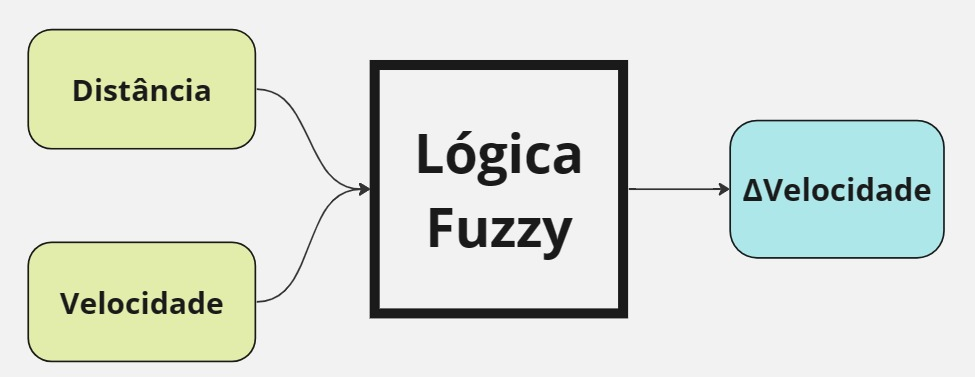

### Baixando e importando os pacotes Python necessários
___

In [11]:
!pip install simpful

In [12]:
import matplotlib.pyplot as plt
import numpy as np
import simpful as sf
from functools import reduce
from mpl_toolkits.mplot3d import Axes3D

#### Fuzzyficação
___
Primeiramente deve-se criar uma instância fuzzy e cadastrar os conjuntos fuzzy de acordo com a variáveis de entrada.

| Velocidade       | Distância      | Incremento     |
| -------------    | -------------  | -------------  |
| devagar: [0,50]  | perto: [0, 10] |acele: [0,10]   |
| normal: [30, 70] | medio: [7, 15] |freia: [-10, 0] |
| rapido: [60, 100]| longe [12, 20] |mantem: [-3, 3] |

In [13]:
# Inicialização
FS = sf.FuzzySystem(show_banner=False)

# Entrada: Velocidade
V1 = sf.FuzzySet(function=sf.Trapezoidal_MF(0, 0, 30, 50), term="devagar")
V2 = sf.FuzzySet(function=sf.Triangular_MF(30, 50, 70) , term="normal")
V3 = sf.FuzzySet(function=sf.Trapezoidal_MF(60, 80, 100, 100), term="rapido")
VELOCIDADE = sf.LinguisticVariable([V1,V2,V3], universe_of_discourse=[0,100])
FS.add_linguistic_variable("VELOCIDADE", LV=VELOCIDADE)

# Entrada: Distancia
D1 = sf.FuzzySet(function=sf.Trapezoidal_MF(0, 0, 6, 10), term="perto")
D2 = sf.FuzzySet(function=sf.Triangular_MF(7, 11, 15) , term="medio")
D3 = sf.FuzzySet(function=sf.Trapezoidal_MF(12, 15, 20, 20), term="longe")
DISTANCIA = sf.LinguisticVariable([D1,D2,D3], universe_of_discourse=[0,20])
FS.add_linguistic_variable("DISTANCIA", LV=DISTANCIA)

# Saida: Incremento
I1 = sf.FuzzySet(function=sf.Trapezoidal_MF(-10,-10,-6,0), term='freiar')
I2 = sf.FuzzySet(function=sf.Triangular_MF(-3,0,3), term='manter')
I3 = sf.FuzzySet(function=sf.Trapezoidal_MF(0,6,10,10), term='acelerar')
INCREMENTO = sf.LinguisticVariable([I1,I2,I3], universe_of_discourse=[-10,10])
FS.add_linguistic_variable("INCREMENTO", LV=INCREMENTO)


In [14]:
## Vamos testar o processo de fuzzyficação
valor_teste = 10
print(f"{valor_teste}km/h é o que: {VELOCIDADE.get_values(valor_teste)}")
valor_teste = 40
print(f"{valor_teste}km/h é o que: {VELOCIDADE.get_values(valor_teste)}")
valor_teste = 62
print(f"{valor_teste}km/h é o que: {VELOCIDADE.get_values(valor_teste)}")

10km/h é o que: {'devagar': 1, 'normal': 0, 'rapido': 0}
40km/h é o que: {'devagar': 0.5, 'normal': 0.5, 'rapido': 0}
62km/h é o que: {'devagar': 0, 'normal': 0.3999999999999999, 'rapido': 0.1}


##### Visualização gráfica

In [15]:
lista = [1,2,3,4,5]
fatorial_resultado = reduce(lambda x, y: x*y, lista)
fatorial_resultado

120

<Axes: xlabel='VELOCIDADE', ylabel='Membership degree'>

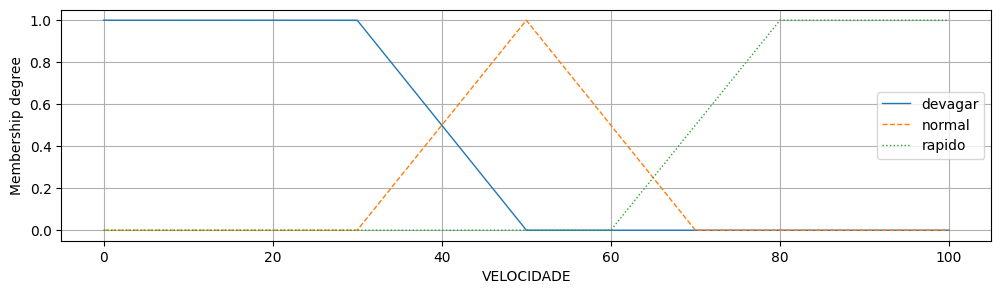

In [16]:
fig, ax = plt.subplots(figsize=(12,3))
ax.grid()
FS.plot_variable(var_name='VELOCIDADE', ax=ax)

<Axes: xlabel='DISTANCIA', ylabel='Membership degree'>

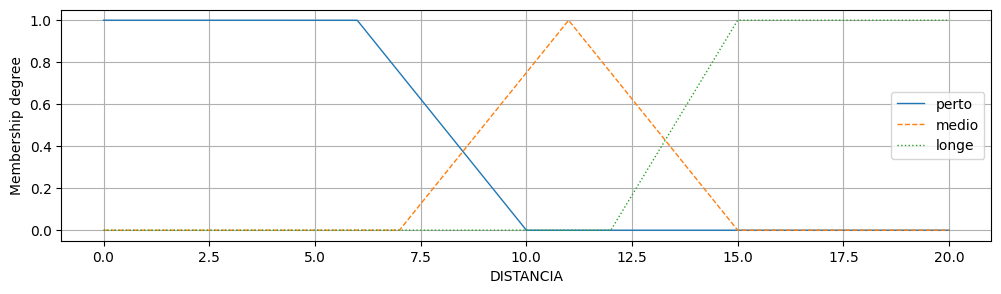

In [17]:
fig, ax = plt.subplots(figsize=(12,3))
ax.grid()
FS.plot_variable(var_name='DISTANCIA', ax=ax)

<Axes: xlabel='INCREMENTO', ylabel='Membership degree'>

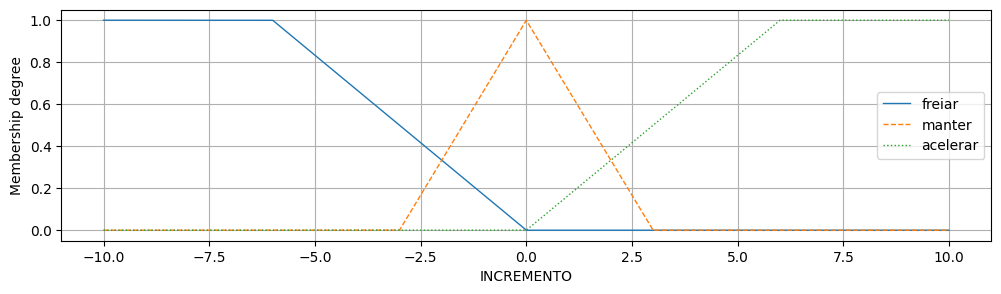

In [18]:
fig, ax = plt.subplots(figsize=(12,3))
ax.grid()
FS.plot_variable(var_name='INCREMENTO', ax=ax)

#### Criação de regras
___
Regras desejadas:

|                  | Perto          | Medio        | Longe      |
| -------------    | -------------  | ---------    |------------|
| **Devagar**      |    M           |     A        |      A     |
| **Normal**       |    F           |     M        |      A     |
| **Rapido**       |    F           |     F        |      M     |

As regras vão precisar ser escritas na seguinte maneira:

"**IF** (Entrada_1 **IS** ruim) **AND** (Entrada_2 **IS** bom) **THEN** (Saida **IS** medio)"

In [19]:
R1 = "IF (VELOCIDADE IS devagar) AND (DISTANCIA IS perto) THEN (INCREMENTO IS manter)"
R2 = "IF (VELOCIDADE IS devagar) AND (DISTANCIA IS medio) THEN (INCREMENTO IS acelerar)"
R3 = "IF (VELOCIDADE IS devagar) AND (DISTANCIA IS longe) THEN (INCREMENTO IS acelerar)"

R4 = "IF (VELOCIDADE IS normal) AND (DISTANCIA IS perto) THEN (INCREMENTO IS freiar)"
R5 = "IF (VELOCIDADE IS normal) AND (DISTANCIA IS medio) THEN (INCREMENTO IS manter)"
R6 = "IF (VELOCIDADE IS normal) AND (DISTANCIA IS longe) THEN (INCREMENTO IS acelerar)"

R7 = "IF (VELOCIDADE IS rapido) AND (DISTANCIA IS perto) THEN (INCREMENTO IS freiar)"
R8 = "IF (VELOCIDADE IS rapido) AND (DISTANCIA IS medio) THEN (INCREMENTO IS freiar)"
R9 = "IF (VELOCIDADE IS rapido) AND (DISTANCIA IS longe) THEN (INCREMENTO IS manter)"

FS.add_rules([R1, R2, R3, R4, R5, R6, R7, R8, R9])

In [20]:
FS.get_rules()

['IF ((VELOCIDADE IS devagar) AND (DISTANCIA IS perto)) THEN (INCREMENTO IS manter)',
 'IF ((VELOCIDADE IS devagar) AND (DISTANCIA IS medio)) THEN (INCREMENTO IS acelerar)',
 'IF ((VELOCIDADE IS devagar) AND (DISTANCIA IS longe)) THEN (INCREMENTO IS acelerar)',
 'IF ((VELOCIDADE IS normal) AND (DISTANCIA IS perto)) THEN (INCREMENTO IS freiar)',
 'IF ((VELOCIDADE IS normal) AND (DISTANCIA IS medio)) THEN (INCREMENTO IS manter)',
 'IF ((VELOCIDADE IS normal) AND (DISTANCIA IS longe)) THEN (INCREMENTO IS acelerar)',
 'IF ((VELOCIDADE IS rapido) AND (DISTANCIA IS perto)) THEN (INCREMENTO IS freiar)',
 'IF ((VELOCIDADE IS rapido) AND (DISTANCIA IS medio)) THEN (INCREMENTO IS freiar)',
 'IF ((VELOCIDADE IS rapido) AND (DISTANCIA IS longe)) THEN (INCREMENTO IS manter)']

#### Defuzzyficação + Inferência
___

In [21]:
vel_teste = 38
distancia_teste = 8
FS.set_variable('VELOCIDADE', vel_teste)
FS.set_variable('DISTANCIA', distancia_teste)
FS.Mamdani_inference(subdivisions=1000)


{'INCREMENTO': -1.0062703941128022}

In [22]:
FS.get_firing_strengths()

[0.5, 0.25, 0.0, 0.4, 0.25, 0.0, 0.0, 0.0, 0.0]

In [23]:
indices = [i for i in range(len(FS.get_firing_strengths())) if FS.get_firing_strengths()[i] > 0]
indices

[0, 1, 3, 4]

In [24]:
activated_rules = np.array(FS.get_rules())[indices]
activated_rules

array(['IF ((VELOCIDADE IS devagar) AND (DISTANCIA IS perto)) THEN (INCREMENTO IS manter)',
       'IF ((VELOCIDADE IS devagar) AND (DISTANCIA IS medio)) THEN (INCREMENTO IS acelerar)',
       'IF ((VELOCIDADE IS normal) AND (DISTANCIA IS perto)) THEN (INCREMENTO IS freiar)',
       'IF ((VELOCIDADE IS normal) AND (DISTANCIA IS medio)) THEN (INCREMENTO IS manter)'],
      dtype='<U83')

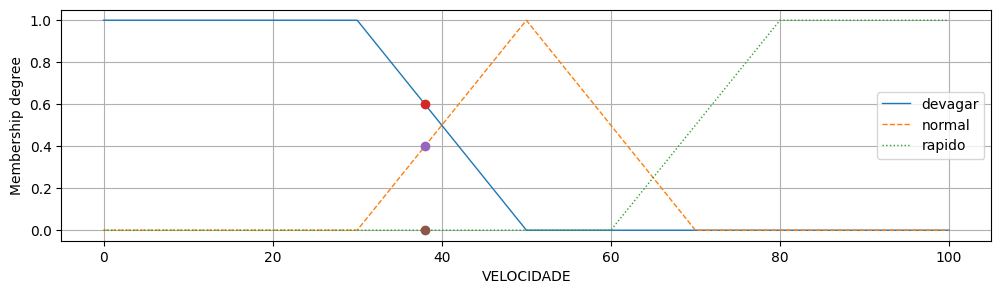

In [25]:
fig, ax = plt.subplots(figsize=(12,3))
ax.grid()
FS.plot_variable(var_name='VELOCIDADE', ax=ax)
ax.plot(vel_teste, VELOCIDADE.get_values(vel_teste)['devagar'], marker='o', ls='',)
ax.plot(vel_teste, VELOCIDADE.get_values(vel_teste)['normal'], marker='o', ls='',)
ax.plot(vel_teste, VELOCIDADE.get_values(vel_teste)['rapido'], marker='o', ls='',)

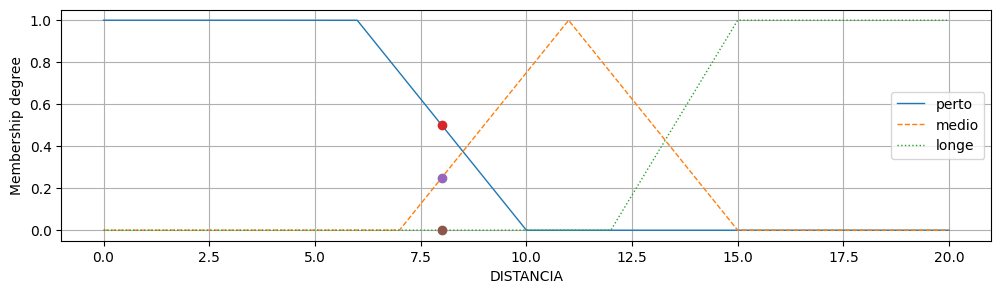

In [26]:
fig, ax = plt.subplots(figsize=(12,3))
ax.grid()
FS.plot_variable(var_name='DISTANCIA', ax=ax)
ax.plot(distancia_teste, DISTANCIA.get_values(distancia_teste)['perto'], marker='o', ls='',)
ax.plot(distancia_teste, DISTANCIA.get_values(distancia_teste)['medio'], marker='o', ls='',)
ax.plot(distancia_teste, DISTANCIA.get_values(distancia_teste)['longe'], marker='o', ls='',)

#### Superfície Fuzzy
___

In [ ]:
X_velocidade = np.arange(0,100,1)
X_len = len(X_velocidade)
Y_distancia = np.arange(0,20,0.2)
Y_len = len(Y_distancia)

Z_decisao = np.zeros((X_len, Y_len))

# Loop para calcular os valores de z
for i in range(X_len):
    for j in range(Y_len):
        FS.set_variable('VELOCIDADE', X_velocidade[i])
        FS.set_variable('DISTANCIA', Y_distancia[j])
        Z_decisao[i,j] = FS.Mamdani_inference()['INCREMENTO']

In [ ]:
X, Y = np.meshgrid(X_velocidade, Y_distancia)
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z_decisao.T, cmap='magma')

ax.set_xlabel('VELOCIDADE')
ax.set_ylabel('DISTANCIA')
ax.set_zlabel('INCREMENTO')

plt.title('Superfície Fuzzy')
plt.tight_layout()
ax.view_init(azim=-30, elev=20)

plt.show()